In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import data from github

url = 'https://raw.githubusercontent.com/bhavna9719/fish_market/master/Fish.csv'
fish = pd.read_csv(url)

In [4]:
# First 5 rows of df

fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
# Rows and columns count

fish.shape

(159, 7)

In [6]:
# Datatypes, null value check

fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [7]:
# Statistical data of df

fish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


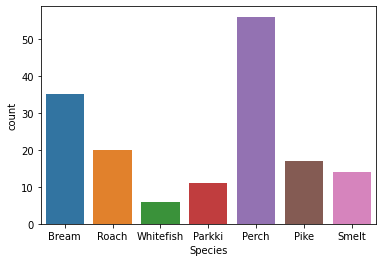

In [8]:
# Species count graph

sns.countplot(fish.Species)
plt.show()

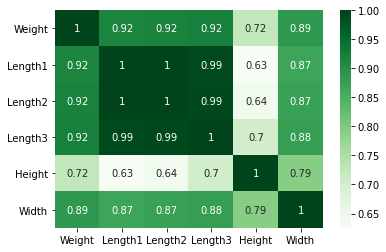

In [9]:
# Correlation check

sns.heatmap(fish.corr(), annot = True, cmap = "Greens")
plt.show()

In [10]:
# Can conclude that every column has a good correlation with target variable

In [11]:
# Create dummies and merge

fish_dum = pd.get_dummies(fish['Species'], drop_first = True)
fish = pd.concat([fish, fish_dum], axis = 1)
fish.drop( "Species", axis = 1, inplace = True)
fish.head()

,Weight,Length1,Length2,Length3,Height,Width,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,0,0,0,0,0,0


In [12]:
# Import required library
from sklearn.model_selection import train_test_split

# Train and test df split
np.random.seed(0)
fish_train, fish_test = train_test_split( fish, train_size = 0.7, test_size = 0.3, random_state = 100)

In [13]:
# Row and column count of train df

fish_train.shape

(111, 12)

In [14]:
# Row and column count of test df

fish_test.shape

(48, 12)

In [15]:
# Import required library

from sklearn.preprocessing import StandardScaler

In [16]:
# Standard scaler 

scaler = StandardScaler()

In [17]:
# scaler() to all the columns except the 'dummy' variables

num_vars = ['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']

fish_train[num_vars] = scaler.fit_transform(fish_train[num_vars])

In [18]:
# Statistical data of train df

fish_train.describe()

,Weight,Length1,Length2,Length3,Height,Width,Parkki,Perch,Pike,Roach,Smelt,Whitefish
count,1.110000e+02,1.110000e+02,1.110000e+02,1.110000e+02,1.110000e+02,1.110000e+02,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,-2.675537e-17,5.243553e-16,3.035610e-16,4.905986e-16,-1.200241e-17,3.195642e-16,0.081081,0.360360,0.108108,0.117117,0.081081,0.045045
std,1.004535e+00,1.004535e+00,1.004535e+00,1.004535e+00,1.004535e+00,1.004535e+00,0.274198,0.482282,0.311925,0.323018,0.274198,0.208344
min,-1.056252e+00,-1.820693e+00,-1.815864e+00,-1.881881e+00,-1.727354e+00,-1.959270e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.468687e-01,-6.775778e-01,-6.661208e-01,-6.532226e-01,-7.161715e-01,-6.021914e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-3.347197e-01,-1.988371e-01,-1.642490e-01,-1.761149e-01,-2.562345e-01,-9.872365e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.953272e-01,5.681250e-01,6.113711e-01,6.767680e-01,7.989702e-01,5.482232e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,3.401737e+00,3.210969e+00,3.202855e+00,3.117195e+00,2.374535e+00,2.239206e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


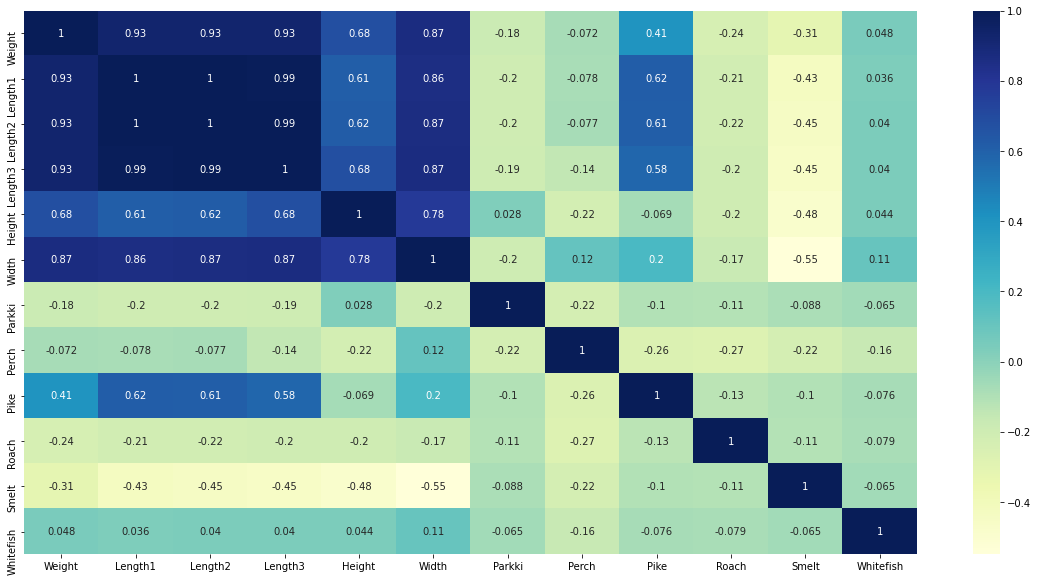

In [19]:
# Correlation recheck

plt.figure( figsize = [20,10])
sns.heatmap( fish_train.corr(), annot = True, cmap = "YlGnBu")
plt.show()

In [20]:
# We can see a detailed view of correlations with low correlation too previously it was high with all

In [21]:
# Prepare dataframe for model building

y_train = fish_train.pop('Weight')
X_train = fish_train

In [22]:
# Import required library and create model one

import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train)
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     134.0
Date:                Wed, 30 Sep 2020   Prob (F-statistic):           2.75e-54
Time:                        18:37:20   Log-Likelihood:                -4.0254
No. Observations:                 111   AIC:                             32.05
Df Residuals:                      99   BIC:                             64.57
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0745      0.283     -0.264      0.793      -0.635       0.486
Length1       -1.3094      1.233     -1.062      0.291      -3.755       1.136
Length2        2.0792      1.600      1.300      0.197      -1.095       5.253
Length3        0.5416      1.107      0.489      0.626      -1.656       2.739
Height        -0.0340      0.189     -0.180      0.858      -0.409       0.341
Width         -0.0339      0.127     -0.266      0.791      -0.286       0.219
Parkki         0.3025      0.239      1.264      0.209      -0.172       0.777
Perch          0.1544      0.396      0.389      0.698      -0.632       0.941
Pike          -0.9550      0.469     -2.037      0.044      -1.885      -0.025
Roach          0.1536      0.306      0.502      0.617      -0.454       0.761
Smelt          0.9505      0.405      2.348      0.021       0.147       1.754
Whitefish      0.0569      0.313      0.182      0.856      -0.565       0.678
==============================================================================
Omnibus:                       31.147   Durbin-Watson:                   2.198
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.986
Skew:                           1.054   Prob(JB):                     8.59e-17
Kurtosis:                       6.400   Cond. No.                         166.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# Drop high p-value variable

X_train.drop( "Height", axis = 1, inplace = True)

In [24]:
# create model two after drop

X_train_lm = sm.add_constant(X_train)
lr_2 = sm.OLS(y_train, X_train_lm).fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     148.8
Date:                Wed, 30 Sep 2020   Prob (F-statistic):           2.23e-55
Time:                        18:37:20   Log-Likelihood:                -4.0435
No. Observations:                 111   AIC:                             30.09
Df Residuals:                     100   BIC:                             59.89
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1082      0.211     -0.513      0.609      -0.527       0.311
Length1       -1.3026      1.226     -1.062      0.291      -3.735       1.130
Length2        2.0817      1.592      1.308      0.194      -1.077       5.240
Length3        0.5203      1.096      0.475      0.636      -1.653       2.694
Width         -0.0476      0.102     -0.469      0.640      -0.249       0.154
Parkki         0.3165      0.225      1.405      0.163      -0.130       0.763
Perch          0.1970      0.316      0.623      0.535      -0.431       0.825
Pike          -0.8879      0.283     -3.142      0.002      -1.449      -0.327
Roach          0.1932      0.212      0.913      0.364      -0.227       0.613
Smelt          0.9953      0.318      3.133      0.002       0.365       1.625
Whitefish      0.0929      0.240      0.387      0.699      -0.383       0.569
==============================================================================
Omnibus:                       31.337   Durbin-Watson:                   2.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.232
Skew:                           1.062   Prob(JB):                     7.60e-17
Kurtosis:                       6.397   Cond. No.                         155.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
# Drop high p-value variable

X_train.drop( "Whitefish", axis = 1, inplace = True)

In [26]:
# create model three after drop

X_train_lm = sm.add_constant(X_train)
lr_3 = sm.OLS(y_train, X_train_lm).fit()
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     166.7
Date:                Wed, 30 Sep 2020   Prob (F-statistic):           1.80e-56
Time:                        18:37:20   Log-Likelihood:                -4.1267
No. Observations:                 111   AIC:                             28.25
Df Residuals:                     101   BIC:                             55.35
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0384      0.109     -0.351      0.726      -0.255       0.179
Length1       -1.2567      1.215     -1.034      0.304      -3.667       1.154
Length2        2.3667      1.406      1.684      0.095      -0.422       5.155
Length3        0.1677      0.607      0.276      0.783      -1.036       1.372
Width         -0.0363      0.097     -0.375      0.708      -0.229       0.156
Parkki         0.2490      0.142      1.751      0.083      -0.033       0.531
Perch          0.0920      0.162      0.567      0.572      -0.230       0.414
Pike          -0.9547      0.223     -4.284      0.000      -1.397      -0.513
Roach          0.1295      0.133      0.976      0.331      -0.134       0.393
Smelt          0.9015      0.205      4.407      0.000       0.496       1.307
==============================================================================
Omnibus:                       30.553   Durbin-Watson:                   2.208
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               71.794
Skew:                           1.037   Prob(JB):                     2.57e-16
Kurtosis:                       6.350   Cond. No.                         144.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
# Drop high p-value variable

X_train.drop( "Length3", axis = 1, inplace = True)

In [28]:
# create model four after drop

X_train_lm = sm.add_constant(X_train)
lr_4 = sm.OLS(y_train, X_train_lm).fit()
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     189.3
Date:                Wed, 30 Sep 2020   Prob (F-statistic):           1.31e-57
Time:                        18:37:20   Log-Likelihood:                -4.1686
No. Observations:                 111   AIC:                             26.34
Df Residuals:                     102   BIC:                             50.72
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0147      0.068     -0.217      0.828      -0.149       0.120
Length1       -1.2905      1.204     -1.072      0.286      -3.678       1.097
Length2        2.5640      1.205      2.127      0.036       0.173       4.955
Width         -0.0350      0.096     -0.364      0.717      -0.226       0.156
Parkki         0.2279      0.119      1.908      0.059      -0.009       0.465
Perch          0.0528      0.078      0.677      0.500      -0.102       0.207
Pike          -0.9837      0.196     -5.022      0.000      -1.372      -0.595
Roach          0.1111      0.114      0.973      0.333      -0.115       0.338
Smelt          0.8703      0.170      5.124      0.000       0.533       1.207
==============================================================================
Omnibus:                       30.033   Durbin-Watson:                   2.198
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.244
Skew:                           1.020   Prob(JB):                     5.58e-16
Kurtosis:                       6.321   Cond. No.                         116.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
# Drop high p-value variable

X_train.drop( "Width", axis = 1, inplace = True)

In [30]:
# create model five after drop

X_train_lm = sm.add_constant(X_train)
lr_5 = sm.OLS(y_train, X_train_lm).fit()
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     218.1
Date:                Wed, 30 Sep 2020   Prob (F-statistic):           9.14e-59
Time:                        18:37:20   Log-Likelihood:                -4.2406
No. Observations:                 111   AIC:                             24.48
Df Residuals:                     103   BIC:                             46.16
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0216      0.065     -0.333      0.740      -0.150       0.107
Length1       -1.3465      1.189     -1.133      0.260      -3.704       1.011
Length2        2.5811      1.199      2.152      0.034       0.202       4.960
Parkki         0.2317      0.118      1.956      0.053      -0.003       0.467
Perch          0.0501      0.077      0.648      0.518      -0.103       0.203
Pike          -0.9273      0.119     -7.782      0.000      -1.164      -0.691
Roach          0.1122      0.114      0.987      0.326      -0.113       0.338
Smelt          0.8859      0.164      5.414      0.000       0.561       1.210
==============================================================================
Omnibus:                       31.314   Durbin-Watson:                   2.181
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.146
Skew:                           1.061   Prob(JB):                     7.93e-17
Kurtosis:                       6.395   Cond. No.                         98.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# Drop high p-value variable

X_train.drop( "Perch", axis = 1, inplace = True)

In [32]:
# create model six after drop

X_train_lm = sm.add_constant(X_train)
lr_6 = sm.OLS(y_train, X_train_lm).fit()
lr_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     255.8
Date:                Wed, 30 Sep 2020   Prob (F-statistic):           6.74e-60
Time:                        18:37:20   Log-Likelihood:                -4.4664
No. Observations:                 111   AIC:                             22.93
Df Residuals:                     104   BIC:                             41.90
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0139      0.035      0.400      0.690      -0.055       0.083
Length1       -0.9646      1.029     -0.937      0.351      -3.006       1.077
Length2        2.1894      1.033      2.119      0.036       0.141       4.238
Parkki         0.1893      0.098      1.923      0.057      -0.006       0.385
Pike          -0.9563      0.110     -8.683      0.000      -1.175      -0.738
Roach          0.0659      0.088      0.748      0.456      -0.109       0.241
Smelt          0.8195      0.127      6.439      0.000       0.567       1.072
==============================================================================
Omnibus:                       31.744   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.099
Skew:                           1.071   Prob(JB):                     2.99e-17
Kurtosis:                       6.444   Cond. No.                         84.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
# Drop high p-value variable

X_train.drop( "Roach", axis = 1, inplace = True)

In [34]:
# create model seven after drop

X_train_lm = sm.add_constant(X_train)
lr_7 = sm.OLS(y_train, X_train_lm).fit()
lr_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     308.2
Date:                Wed, 30 Sep 2020   Prob (F-statistic):           4.81e-61
Time:                        18:37:20   Log-Likelihood:                -4.7639
No. Observations:                 111   AIC:                             21.53
Df Residuals:                     105   BIC:                             37.79
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0266      0.030      0.882      0.380      -0.033       0.086
Length1       -0.7083      0.969     -0.731      0.466      -2.629       1.212
Length2        1.9236      0.968      1.987      0.049       0.004       3.843
Parkki         0.1699      0.095      1.793      0.076      -0.018       0.358
Pike          -0.9596      0.110     -8.739      0.000      -1.177      -0.742
Smelt          0.7817      0.117      6.708      0.000       0.551       1.013
==============================================================================
Omnibus:                       28.606   Durbin-Watson:                   2.212
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.358
Skew:                           0.992   Prob(JB):                     1.75e-14
Kurtosis:                       6.124   Cond. No.                         79.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
# Drop high p-value variable

X_train.drop( "Length1", axis = 1, inplace = True)

In [36]:
# create model eight after drop

X_train_lm = sm.add_constant(X_train)
lr_8 = sm.OLS(y_train, X_train_lm).fit()
lr_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     386.8
Date:                Wed, 30 Sep 2020   Prob (F-statistic):           2.99e-62
Time:                        18:37:20   Log-Likelihood:                -5.0459
No. Observations:                 111   AIC:                             20.09
Df Residuals:                     106   BIC:                             33.64
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0330      0.029      1.144      0.255      -0.024       0.090
Length2        1.2163      0.037     33.257      0.000       1.144       1.289
Parkki         0.1634      0.094      1.736      0.086      -0.023       0.350
Pike          -0.9873      0.103     -9.603      0.000      -1.191      -0.784
Smelt          0.7466      0.106      7.047      0.000       0.537       0.957
==============================================================================
Omnibus:                       27.182   Durbin-Watson:                   2.219
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.797
Skew:                           0.943   Prob(JB):                     1.04e-13
Kurtosis:                       6.062   Cond. No.                         5.14
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
# Drop high p-value variable

X_train.drop( "Parkki", axis = 1, inplace = True)

In [38]:
# create model nine after drop

X_train_lm = sm.add_constant(X_train)
lr_9 = sm.OLS(y_train, X_train_lm).fit()
lr_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Weight   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     505.2
Date:                Wed, 30 Sep 2020   Prob (F-statistic):           5.39e-63
Time:                        18:37:20   Log-Likelihood:                -6.6010
No. Observations:                 111   AIC:                             21.20
Df Residuals:                     107   BIC:                             32.04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0480      0.028      1.730      0.087      -0.007       0.103
Length2        1.2001      0.036     33.621      0.000       1.129       1.271
Pike          -0.9741      0.103     -9.413      0.000      -1.179      -0.769
Smelt          0.7073      0.104      6.770      0.000       0.500       0.914
==============================================================================
Omnibus:                       21.982   Durbin-Watson:                   2.230
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.375
Skew:                           0.829   Prob(JB):                     1.71e-09
Kurtosis:                       5.445   Cond. No.                         4.90
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
# Import required libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Length2,2.04
1,Pike,1.67
2,Smelt,1.37


In [41]:
# Predict the target variable using final model

y_train_weight = lr_9.predict(X_train_lm)

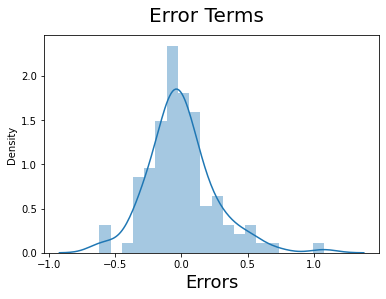

In [42]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_weight), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

In [43]:
# Prepare test dataframe

In [44]:
# Scale previously scaled variables
fish_test[num_vars] = scaler.transform(fish_test[num_vars])

In [45]:
# Statistical values check
fish_test.describe()

,Weight,Length1,Length2,Length3,Height,Width,Parkki,Perch,Pike,Roach,Smelt,Whitefish
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,0.025888,0.036259,0.034979,0.039569,0.098735,0.010812,0.041667,0.333333,0.104167,0.145833,0.104167,0.020833
std,0.897305,0.918729,0.922990,0.931927,1.125454,1.039884,0.201941,0.476393,0.308709,0.356674,0.308709,0.144338
min,-1.072250,-1.644829,-1.688114,-1.712993,-1.724831,-2.019783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.733311,-0.689791,-0.670683,-0.699667,-0.630789,-0.625814,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.211346,0.196857,0.200749,0.279882,-0.270549,-0.058832,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.825805,0.758644,0.793870,0.845656,0.881678,0.957349,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.639257,1.823598,1.797614,1.698538,2.452560,1.911305,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
# Prepare test dataset

y_test = fish_test.pop('Weight')
X_test = fish_test

In [47]:
# Adding constant variable to test dataframe

X_test_m1 = sm.add_constant(X_test)

In [48]:
# Creating X_test_m1 dataframe by dropping variables from X_test_m1

X_test_m1 = X_test_m1.drop(["Height", "Whitefish", "Length3", "Width", "Perch", "Roach", "Length1", "Parkki"], axis = 1)

In [49]:
# Making predictions using the ninth model

y_pred_m1 = lr_9.predict(X_test_m1)

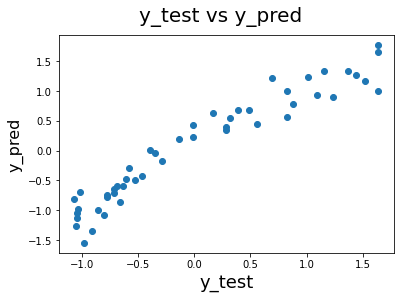

In [50]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m1)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  
plt.show()

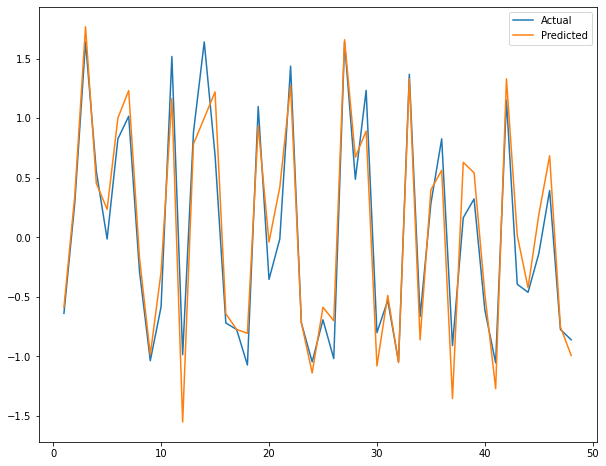

In [54]:
# Check predicted vs actual target variable

plt.figure( figsize = [10,8])
n = range(1,len(y_test)+1)
plt.plot(n, y_test, label = "Actual")
plt.plot(n, y_pred_m1, label = "Predicted")
plt.legend()
plt.show()

In [52]:
# Checking R-square value of test dataset

from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m1)

0.9143237254054878

In [53]:
# The equation of best fitted line is:

# Weight = const * 0.0480 + Length2 *	1.2001 + Smelt * 0.7073 + Pike * -0.9741